#  Question 2 : Do older planes suffer more delays ?


### Read Neccesary Libraries 

In [1]:

import pandas as pd
from datetime import datetime
import sqlite3 as sqlite3
import pyarrow as pa
import pyarrow.csv as pcsv
import matplotlib.pyplot as plt

### Read the data and connect to SQLite then append data to table in SQL

In [2]:


# Read the data
d1 = pcsv.read_csv("D:/R files/2004.csv").to_pandas()
d2 = pcsv.read_csv("D:/R files/2005.csv").to_pandas()
d3 = pcsv.read_csv("D:/R files/2006.csv").to_pandas()
plane_data = pd.read_csv("D:/R files/plane-data.csv")
airports = pcsv.read_csv("D:/R files/airports.csv").to_pandas()

conn = sqlite3.connect("Coursework_1234.db")
c = conn.cursor()

# Remove table if it exists
c.execute('''DROP TABLE IF EXISTS d36''')
# Remove table if it exists
c.execute('''DROP TABLE IF EXISTS airports''')

# Remove table if it exists
c.execute('''DROP TABLE IF EXISTS plane_data''')

#use .to_sql to create the tables and data from jupyter to SQL
airports.to_sql('airports', con = conn, index = False)
plane_data.to_sql('plane_data',con=conn,index=False)
d1.to_sql('d36', conn, if_exists='append', index=False)
d2.to_sql('d36', conn, if_exists='append', index=False)
d3.to_sql('d36', conn, if_exists='append', index=False)






7141922

In [3]:

#Query the data from SQL usin SQL Command
query = c.execute('''
SELECT d36.Year, d36.Month, d36.TailNum, d36.ArrDelay, d36.DepDelay,plane_data.year 
FROM d36 
INNER JOIN plane_data ON d36.TailNum = plane_data.tailnum 
WHERE d36.Diverted = 0 AND d36.Cancelled = 0
''').fetchall()

In [4]:
#changing query from a list to a dataframe which will be used for plotting graphs
df= (pd.DataFrame(query, columns = ['Year','Month','TailNum','ArrDelay','DepDelay','year'])) 

In [5]:
## Remove data that have year 'None' or None 
df = df[~df['year'].isin(['None', None])]

In [7]:
### Convert Year and year to integer then add new column Plane life which is the difference between Year and year
df['Year'] = df['Year'].astype(int)
df['year'] = df['year'].astype(int)
df['Plane_life'] = df['Year'] - df['year']

In [10]:
## Group the data based on Plane_life then calculate mean of ArrDelay and DepDelay based on Plane_life
plot_1 = df.loc[(~df['Plane_life'].isna())] \
           .groupby('Plane_life') \
           .agg(AVGDelay=('DepDelay', 'mean'), 
                AVGArrDelay=('ArrDelay', 'mean'), 
                AVGDepDelay=('DepDelay', 'mean'), 
                Count=('TailNum', 'count'), 
                distinct_categories=('TailNum', 'nunique')) \
           .reset_index()

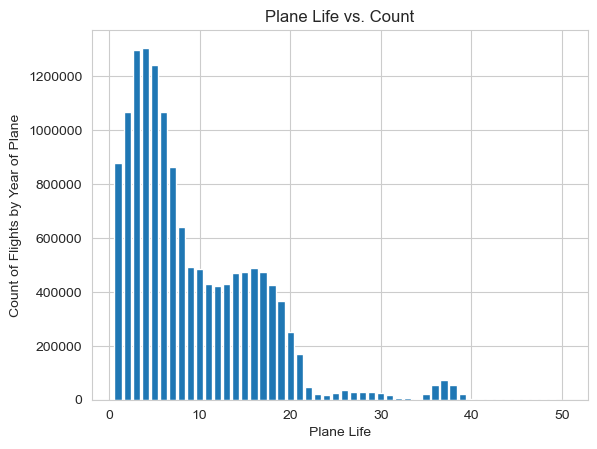

In [11]:
### Count plot number of flights by age of plane  
plt.bar(plot_1.loc[(plot_1['Plane_life']>0)&(plot_1['Plane_life']<=50),'Plane_life'], plot_1.loc[(plot_1['Plane_life']>0)&(plot_1['Plane_life']<=50),'Count'])
plt.title('Plane Life vs. Count')
plt.xlabel('Plane Life')
plt.ylabel('Count of Flights by Year of Plane')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

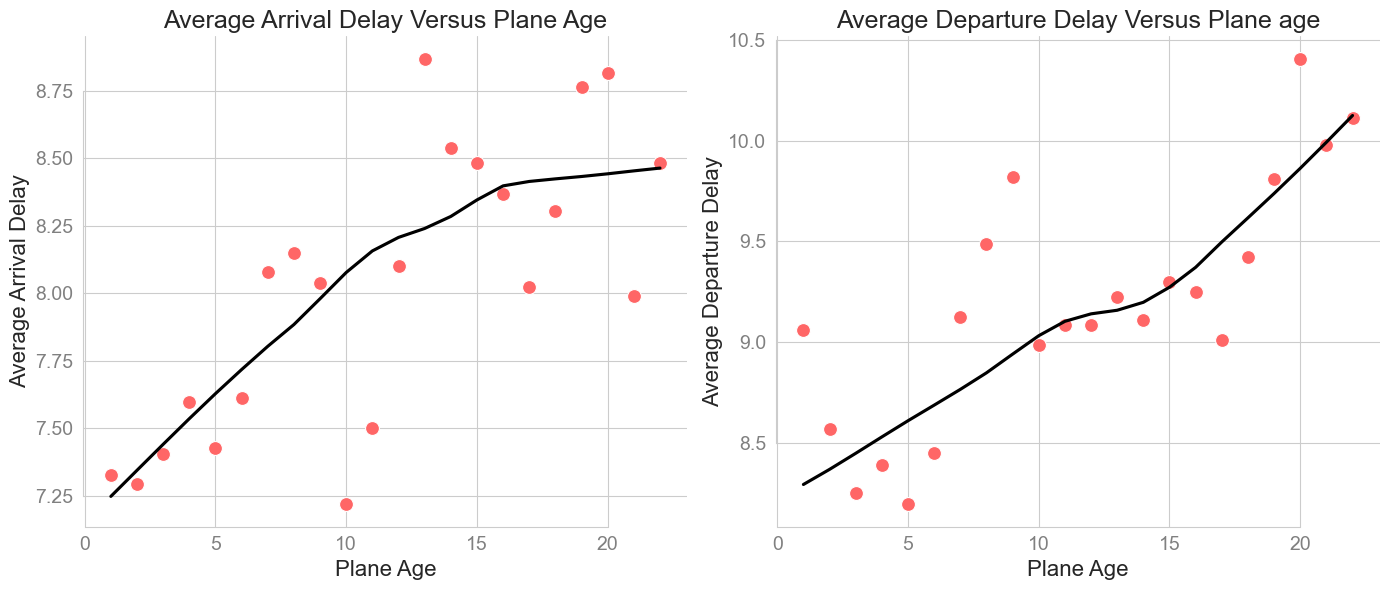

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

# create the first subplot with scatter plot and regression line
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14,6))
ax1 = axs[0]
sns.scatterplot(data=plot_1.loc[(plot_1['Plane_life']>0)&(plot_1['Plane_life']<=22),], x='Plane_life', y='AVGArrDelay', color='#FF6666', s=100, ax=ax1)
sns.regplot(data=plot_1.loc[(plot_1['Plane_life']>0)&(plot_1['Plane_life']<=22),], x='Plane_life', y='AVGArrDelay', color='black', scatter=False, lowess=True, ax=ax1)
ax1.set_title('Average Arrival Delay Versus Plane Age', fontsize=18)
ax1.set_xlabel('Plane Age', fontsize=16)
ax1.set_ylabel('Average Arrival Delay', fontsize=16)
ax1.tick_params(labelsize=14, colors='grey')

# create the second subplot with scatter plot and regression line
ax2 = axs[1]
sns.scatterplot(data=plot_1.loc[(plot_1['Plane_life']>0)&(plot_1['Plane_life']<=22),], x='Plane_life', y='AVGDepDelay', color='#FF6666', s=100, ax=ax2)
sns.regplot(data=plot_1.loc[(plot_1['Plane_life']>0)&(plot_1['Plane_life']<=22),], x='Plane_life', y='AVGDepDelay', color='black', scatter=False, lowess=True, ax=ax2)
ax2.set_title('Average Departure Delay Versus Plane age', fontsize=18)
ax2.set_xlabel('Plane Age', fontsize=16)
ax2.set_ylabel('Average Departure Delay', fontsize=16)
ax2.tick_params(labelsize=14, colors='grey')



sns.despine(trim=True)
plt.tight_layout()
plt.show()


In [8]:


# the groups are selected based on whether the Plane_life column is not null and the ArrDelay     
#column is greater than zero. The resulting groups are then used to compute the mean departure delay (AVGDelay), 
#mean arrival delay (AVGArrDelay), mean departure delay again (AVGDepDelay), the number of flights associated with each group 
#(Count), and the number of distinct aircraft tail numbers associated with each group (distinct_categories).



plot_1 = df.loc[(~df['Plane_life'].isna())&df['ArrDelay']>0] \
           .groupby('Plane_life') \
           .agg(AVGDelay=('DepDelay', 'mean'), 
                AVGArrDelay=('ArrDelay', 'mean'), 
                AVGDepDelay=('DepDelay', 'mean'), 
                Count=('TailNum', 'count'), 
                distinct_categories=('TailNum', 'nunique')) \
           .reset_index()

#the groups are selected based on whether the Plane_life column is not null and the
#DepDelay column is greater than zero. The resulting groups are then used to compute the
#mean departure delay (AVGDelay), mean arrival delay (AVGArrDelay), mean departure delay again
#(AVGDepDelay), the number of flights associated with each group (Count), and 
#the number of distinct aircraft tail numbers associated with each group (distinct_categories).

plot_2 = df.loc[(~df['Plane_life'].isna())&df['DepDelay']>0] \
           .groupby('Plane_life') \
           .agg(AVGDelay=('DepDelay', 'mean'), 
                AVGArrDelay=('ArrDelay', 'mean'), 
                AVGDepDelay=('DepDelay', 'mean'), 
                Count=('TailNum', 'count'), 
                distinct_categories=('TailNum', 'nunique')) \
           .reset_index()

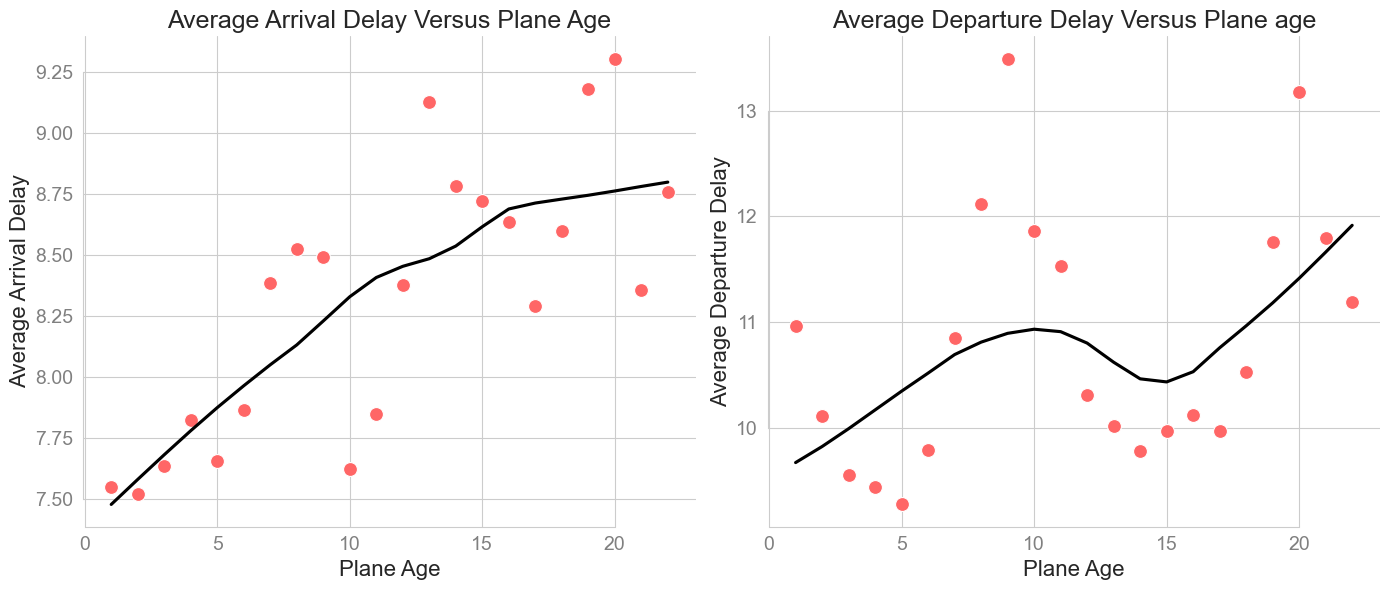

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

# create the first subplot with scatter plot and regression line
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14,6))
ax1 = axs[0]
sns.scatterplot(data=plot_1.loc[(plot_1['Plane_life']>0)&(plot_1['Plane_life']<=22)&plot_1['AVGArrDelay']>0,], x='Plane_life', y='AVGArrDelay', color='#FF6666', s=100, ax=ax1)
sns.regplot(data=plot_1.loc[(plot_1['Plane_life']>0)&(plot_1['Plane_life']<=22)&plot_1['AVGArrDelay']>0,], x='Plane_life', y='AVGArrDelay', color='black', scatter=False, lowess=True, ax=ax1)
ax1.set_title('Average Arrival Delay Versus Plane Age', fontsize=18)
ax1.set_xlabel('Plane Age', fontsize=16)
ax1.set_ylabel('Average Arrival Delay', fontsize=16)
ax1.tick_params(labelsize=14, colors='grey')

# create the second subplot with scatter plot and regression line
ax2 = axs[1]
sns.scatterplot(data=plot_2.loc[(plot_1['Plane_life']>0)&(plot_1['Plane_life']<=22)&plot_2['AVGDepDelay']>0,], x='Plane_life', y='AVGDepDelay', color='#FF6666', s=100, ax=ax2)
sns.regplot(data=plot_2.loc[(plot_2['Plane_life']>0)&(plot_1['Plane_life']<=22)&plot_2['AVGDepDelay']>0,], x='Plane_life', y='AVGDepDelay', color='black', scatter=False, lowess=True, ax=ax2)
ax2.set_title('Average Departure Delay Versus Plane age', fontsize=18)
ax2.set_xlabel('Plane Age', fontsize=16)
ax2.set_ylabel('Average Departure Delay', fontsize=16)
ax2.tick_params(labelsize=14, colors='grey')

sns.despine(trim=True)
plt.tight_layout()
plt.show()
